# Binary Classification with KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data = pd.read_csv('../data/credit_card_approval.csv')

In [3]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Higher education,Married,House / apartment,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,F,N,Y,0,NaN,Higher education,Married,House / apartment,-2182,1,0,0,0,2,0
1537,5023655,F,N,N,0,225000.0,Incomplete higher,Single / not married,House / apartment,-1209,1,0,0,0,1,0
1538,5115992,M,Y,Y,2,180000.0,Higher education,Married,House / apartment,-2477,1,0,0,0,4,0
1539,5118219,M,Y,N,0,270000.0,Secondary / secondary special,Civil marriage,House / apartment,-645,1,1,1,0,2,0


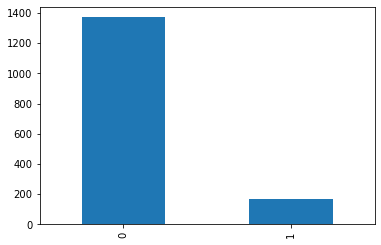

In [4]:
data['label'].value_counts().plot.bar()
plt.show()

In [5]:
data['Employed_days'].describe()

count      1541.000000
mean      59405.890980
std      137847.216798
min      -14887.000000
25%       -3173.000000
50%       -1563.000000
75%        -431.000000
max      365243.000000
Name: Employed_days, dtype: float64

In [6]:
data = data[data['Employed_days'] < 365243.000000]

In [7]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     19
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

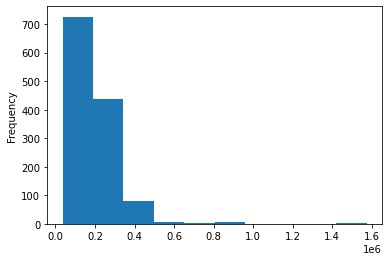

In [8]:
data['Annual_income'].plot.hist()

In [9]:
# data['Annual_income'] = data['Annual_income'].fillna(value=data['Annual_income'].median())
imputer = IterativeImputer()
data[['Annual_income', 'Employed_days']] = imputer.fit_transform(data[['Annual_income', 'Employed_days']])

C:\Users\mimi_\AppData\Local\Temp/ipykernel_18172/2550903317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Annual_income', 'Employed_days']] = imputer.fit_transform(data[['Annual_income', 'Employed_days']])
C:\Users\mimi_\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [10]:
data.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

## Encoding variables

In [11]:
data['GENDER'].value_counts()

F    759
M    522
Name: GENDER, dtype: int64

In [12]:
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

C:\Users\mimi_\AppData\Local\Temp/ipykernel_18172/1569690913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENDER'] = label_encoder.fit_transform(data['GENDER'])


In [13]:
def encode_boolean(bool_value):
    if bool_value == 'Y':
        return 1
    else:
        return 0

In [14]:
data['Car_Owner'] = data['Car_Owner'].apply(encode_boolean)

C:\Users\mimi_\AppData\Local\Temp/ipykernel_18172/3779857685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car_Owner'] = data['Car_Owner'].apply(encode_boolean)


In [15]:
data['Propert_Owner'] = data['Propert_Owner'].apply(encode_boolean)

C:\Users\mimi_\AppData\Local\Temp/ipykernel_18172/829091012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Propert_Owner'] = data['Propert_Owner'].apply(encode_boolean)


In [16]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,5009744,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198872.679668,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
5,5009754,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,0,0,1,0,198870.720702,Higher education,Married,House / apartment,-2182.0,1,0,0,0,2,0
1537,5023655,0,0,0,0,225000.000000,Incomplete higher,Single / not married,House / apartment,-1209.0,1,0,0,0,1,0
1538,5115992,1,1,1,2,180000.000000,Higher education,Married,House / apartment,-2477.0,1,0,0,0,4,0
1539,5118219,1,1,0,0,270000.000000,Secondary / secondary special,Civil marriage,House / apartment,-645.0,1,1,1,0,2,0


In [17]:
data['EDUCATION'].value_counts()

Secondary / secondary special    822
Higher education                 378
Incomplete higher                 65
Lower secondary                   14
Academic degree                    2
Name: EDUCATION, dtype: int64

In [18]:
education_encoding = {
    "Lower secondary": 0,
    "Secondary / secondary special": 1,
    "Incomplete higher": 2,  
    "Higher education": 3,
    "Academic degree": 4,
}

In [19]:
def encode_education(education):
    return education_encoding[education]

In [20]:
data['EDUCATION'] = data['EDUCATION'].apply(encode_education)

C:\Users\mimi_\AppData\Local\Temp/ipykernel_18172/3510317950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EDUCATION'] = data['EDUCATION'].apply(encode_education)


In [21]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,5009744,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198872.679668,3,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
5,5009754,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,0,0,1,0,198870.720702,3,Married,House / apartment,-2182.0,1,0,0,0,2,0
1537,5023655,0,0,0,0,225000.000000,2,Single / not married,House / apartment,-1209.0,1,0,0,0,1,0
1538,5115992,1,1,1,2,180000.000000,3,Married,House / apartment,-2477.0,1,0,0,0,4,0
1539,5118219,1,1,0,0,270000.000000,1,Civil marriage,House / apartment,-645.0,1,1,1,0,2,0


In [22]:
data['Marital_status'].value_counts()

Married                 892
Single / not married    194
Civil marriage           92
Separated                74
Widow                    29
Name: Marital_status, dtype: int64

# One-hot encoder from sklearn

In [23]:
# onehot_enc = OneHotEncoder()
# onehot_enc.fit_transform(data[['Marital_status', 'Housing_type']]).toarray()

In [24]:
# column_categories = list(onehot_enc.categories_[0]) + list(onehot_enc.categories_[1])

In [25]:
# data[column_categories] = onehot_enc.transform(data[['Marital_status', 'Housing_type']]).toarray()

## One-hot encoder pandas

In [26]:
enc_data = pd.get_dummies(data[['Marital_status', 'Housing_type']])
data = pd.concat([data, enc_data], axis=1)

In [27]:
data = data.drop(columns=['Marital_status', 'Housing_type', 'Ind_ID'])

## KNN classification

### Metrics
https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score


![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312bddc62339aca43afb_a2ghbGg3E2DBPUAFkYoOvZRAU5pgmLjMJ-M7qhqMbDZwmt59CoGXo0AaU5i7zOsQkCCm9oLMSTkA6frmZ1xEMcxhRcm4-uQ4p_W6UdkSUaZJ0gjyRf0I0cgSI8RtJNGxmiXgmKkNk-EDM7huR3YMMFtjRV5IgNeK9ZueKnS6b5BEqaw7w0N4qi7DZYVBWw.png)
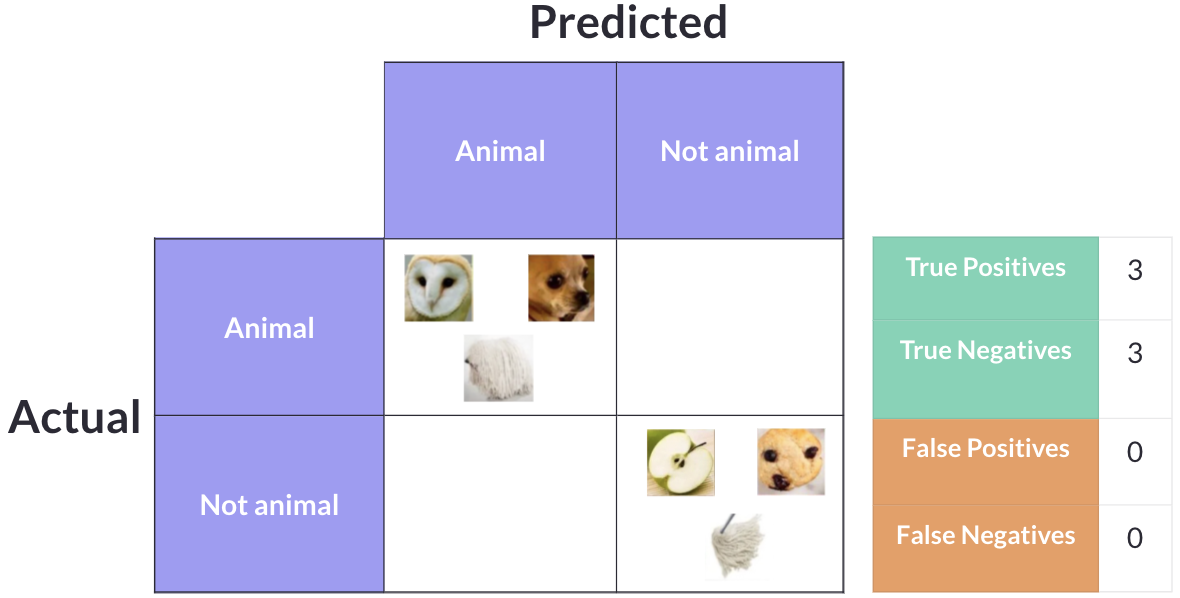

![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312b86fe50353faff33f_b1hZQjw_VUEo9lC2JU_KHnLhyhhgS4X7ABh_dvesvbmCWWr-5klirZtujMXPWzVjQtQXz3mIaZzpVaXYCuCWeD0OX4cFSIqEkuSMsnKVNeOR3NSMfDx6cMw_h0VpwSx2ktl6b0rO-47wtFd_Ez6Q6_bOzqVMu715n61YV3ELamwfQOfpg9kd6OKz6QtoiA.png)

![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312b86fe50cbb5aff369_s5DUTobZ_IV81v5DRuVDP8x4TGzIgu6HBRnU2uFw6GAJeotedHvzL6COHit7yz7Uuvs8wieZIe2gCJNy4RkZQHZSzZqehgr8MngwkhbcI0p0loYlC35lKgzonTlvroC5t0Swwp820neVOEgsDWwlzfuWWLCmp_tSQIU5xVVKC6bd2lKV67_AbMDTVOnw5w.png)
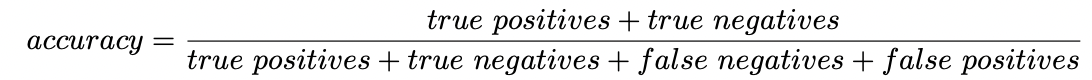

![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312b93b4e700f7ed539f_F0UROoldDgIawO9KVBShiUK2lDPt1v5wTm5YMr-oOE83oOBbMMkWYOEeZnnWGI-0ZwwcNx1BvMGKSv-GbF4pggh2q8Z6P1fQgboW2zL6ktqOaJetXbGSUQFx6P1Ah-Zz8XPB596qGuhXzLdJyhv0altnSKkqlw1veOuvvPjLU8NcGNVlpTTl-PYhyZLN5Q.png)
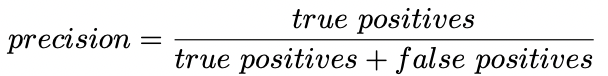

![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312bddc623f50aa43b52_Ttp9NjMsqUUS0vllpfAWCC6lLMbluniEMHDBspNXPNKi7iDThZzJ-xMgHL5vDWnKdElq50g0wvBxIco9oaY8_sBbqxpr0H_4twHr2fyOjB6sm2g9B2V9cojcc44dcRLVyUKmfH4VsbfVGSWwcrce40ONkrRm0FBJ8ZKo6AiNH2KSWsDD8hJSmBXMSk7Fpg.png)
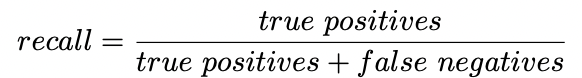

![image.png](https://uploads-ssl.webflow.com/5fed49be52334588b156311c/6369312b1a6a71e630ff6647_AxQGlrOBWDDXnJ1vy1RJw84ZxP9kwM6V20lnT4YOie8uFDFWJYKdCVULk-LBENS4QVQxAgrXhXaPCI3UnNza5gBXoHk0-W2lWCxfzeRr4MEunBo5gtLh5yOtZEMuUQkHwikAjm6YGBTUyOxjmro13KUPHhbjiei37LzZnytsZhbRSwiF4236Bx9JBjArIQ.png)
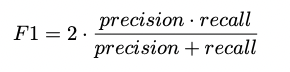

In [28]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Employed_days,Mobile_phone,Work_Phone,Phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1,0,1,0,0,315000.000000,3,-586.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,315000.000000,3,-586.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,198872.679668,3,-586.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,315000.000000,3,-586.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,315000.000000,3,-586.0,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0,0,1,0,198870.720702,3,-2182.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1537,0,0,0,0,225000.000000,2,-1209.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1538,1,1,1,2,180000.000000,3,-2477.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1539,1,1,0,0,270000.000000,1,-645.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [29]:
scaler = MinMaxScaler()
data[['Annual_income', 'Employed_days', 'EDUCATION', 'CHILDREN', 'Family_Members']] = scaler.fit_transform(data[['Annual_income', 'Employed_days', 'EDUCATION', 'CHILDREN', 'Family_Members']])

In [30]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Employed_days,Mobile_phone,Work_Phone,Phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1,0,1,0,0.000000,0.181287,0.75,0.965371,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0.000000,0.181287,0.75,0.965371,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0.000000,0.105830,0.75,0.965371,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0.000000,0.181287,0.75,0.965371,1,1,1,...,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0.000000,0.181287,0.75,0.965371,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0,0,1,0.000000,0.105829,0.75,0.857635,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1537,0,0,0,0.000000,0.122807,0.50,0.923316,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1538,1,1,1,0.142857,0.093567,0.75,0.837721,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1539,1,1,0,0.000000,0.152047,0.25,0.961388,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [31]:
data.describe()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Employed_days,Mobile_phone,Work_Phone,Phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0,1281.000000,1281.000000,...,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,0.407494,0.434817,0.631538,0.035017,0.105829,0.408665,0.824775,1.0,0.250585,0.308353,...,0.696331,0.057767,0.151444,0.022639,0.003903,0.882904,0.028884,0.007026,0.015613,0.061671
std,0.491560,0.495927,0.482576,0.058960,0.075220,0.231020,0.162063,0.0,0.433519,0.461993,...,0.460021,0.233394,0.358621,0.148806,0.062378,0.321660,0.167545,0.083557,0.124020,0.240650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.064327,0.250000,0.768260,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.093567,0.250000,0.873093,1.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.071429,0.122807,0.750000,0.942014,1.0,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X, Y = data.drop(columns=['label']), data['label']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
Y_pred = knn.predict(X_test)

In [37]:
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       221
           1       0.50      0.28      0.36        36

    accuracy                           0.86       257
   macro avg       0.70      0.62      0.64       257
weighted avg       0.84      0.86      0.84       257


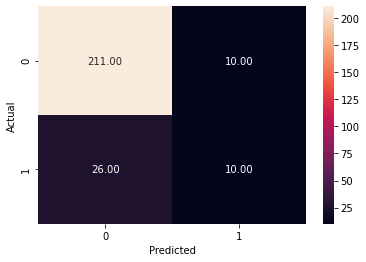

In [39]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## How to choose the value of K

In [40]:
scores = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, Y_test)
    scores.append(sc)

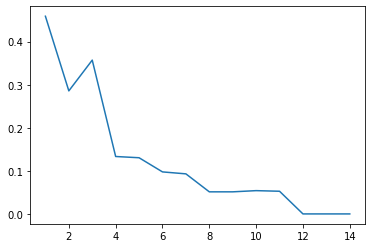

In [41]:
plt.plot(np.arange(1, 15), scores)
plt.show()

### Highest f1-score with 1 neighbor

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
Y_pred = knn.predict(X_test)

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       221
           1       0.56      0.39      0.46        36

    accuracy                           0.87       257
   macro avg       0.73      0.67      0.69       257
weighted avg       0.86      0.87      0.86       257


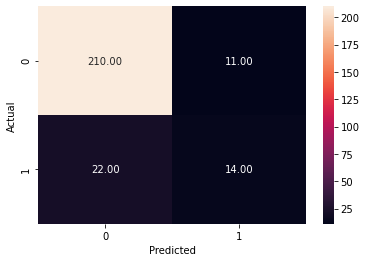

In [45]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()